## Parse and Plot

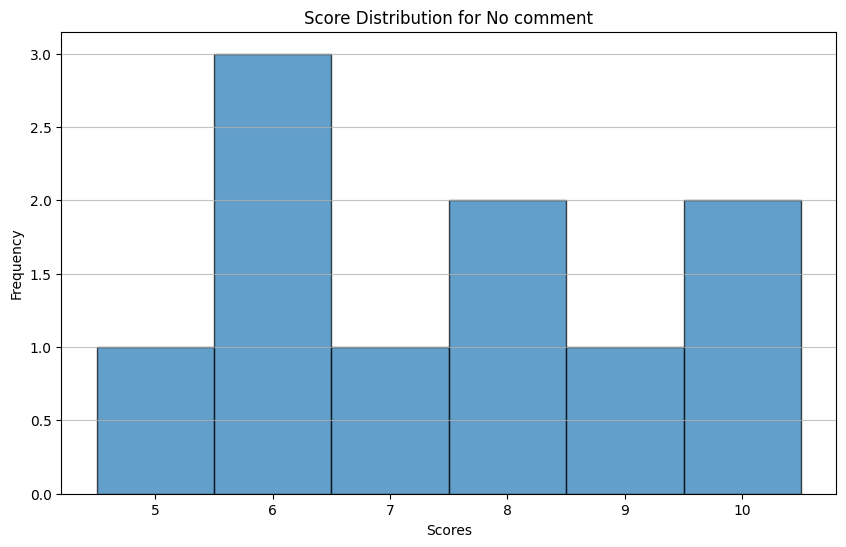

No_hint - Mean: 7.50, Standard Deviation: 1.69


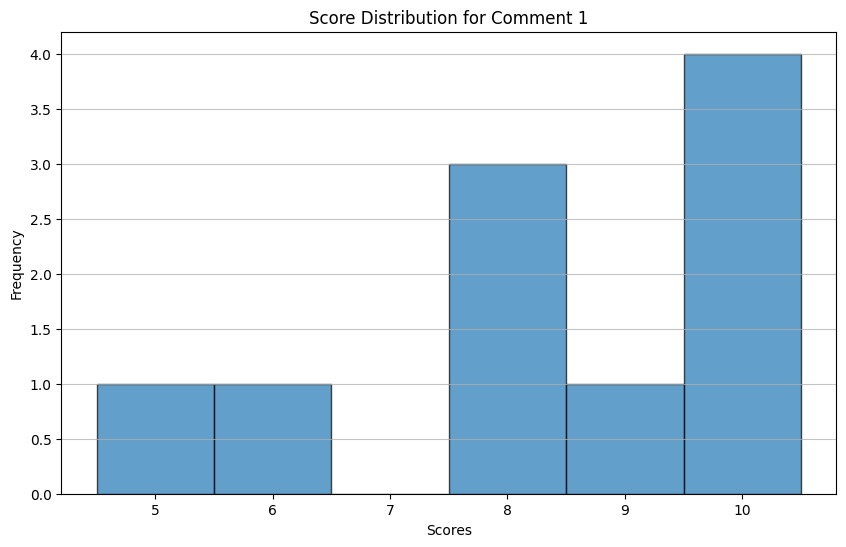

Hint1 - Mean: 8.40, Standard Deviation: 1.69


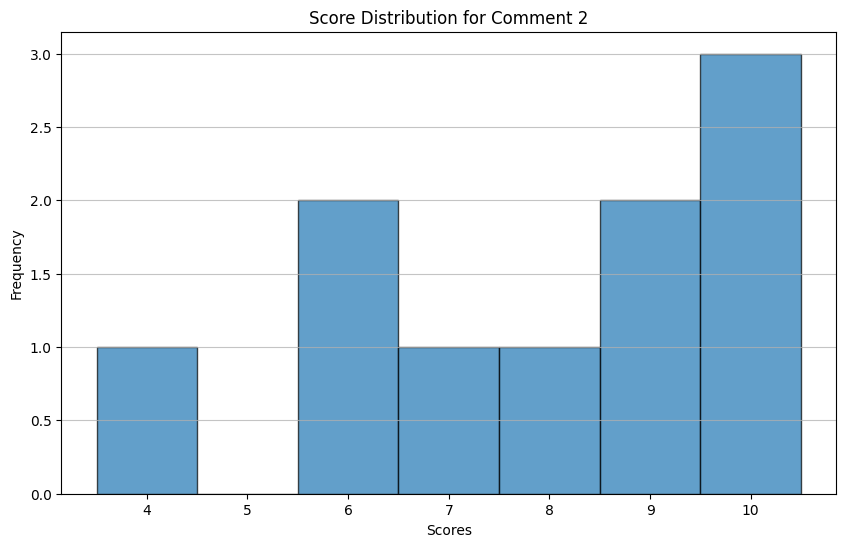

Hint2 - Mean: 7.90, Standard Deviation: 1.97


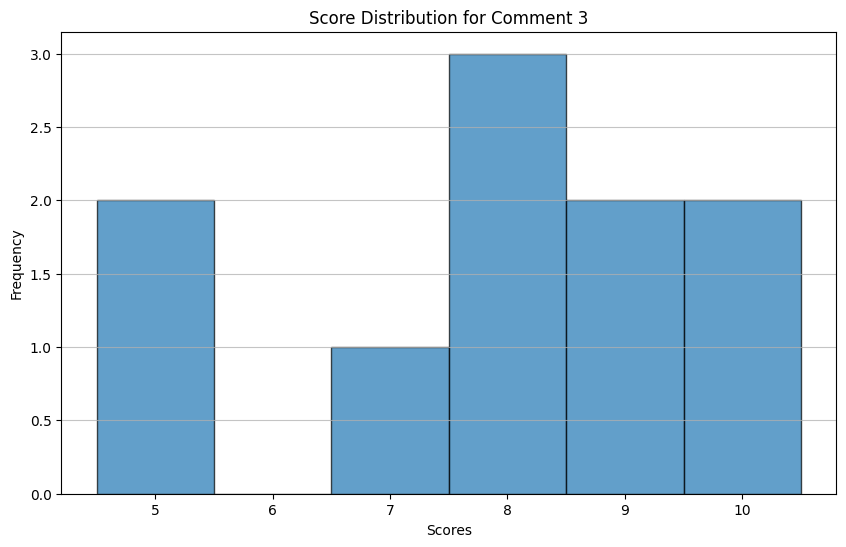

Hint3 - Mean: 7.90, Standard Deviation: 1.70


In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_stats(data, key):
    # Extract the grades for the given key and convert them to float
    grades = [float(item[key]['grade']) for item in data if key in item]
    mean = np.mean(grades)
    std_dev = np.std(grades)
    return grades, mean, std_dev

def plot_distribution(data, category, grades):
    plt.figure(figsize=(10, 6))
    # Convert grades to integers for histogram bin edges if necessary
    bin_edges = np.arange(int(min(grades)), int(max(grades)) + 2) - 0.5
    plt.hist(grades, bins=bin_edges, alpha=0.7, edgecolor='black')
    if category == 'No_hint':
        cate = 'No comment'
    elif category == 'Hint1':
        cate = 'Comment 1'
    elif category == 'Hint1_summary':
        cate = 'Insight 1'
    elif category == 'Hint2':
        cate = 'Comment 2'
    elif category == 'Hint2_summary':
        cate = 'Insight 2'
    elif category == 'Hint3':
        cate = 'Comment 3'
    elif category == 'Hint3_summary':
        cate = 'Insight 3'
    plt.title(f'Score Distribution for {cate}')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(np.arange(int(min(grades)), int(max(grades)) + 1))
    plt.show()

def parse_and_plot(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        quiz_data = json.load(file)
        
    categories = ['No_hint', 'Hint1', 'Hint2', 'Hint3']
    stats = {}
    
    for category in categories:
        grades, mean, std_dev = calculate_stats(quiz_data, category)
        stats[category] = {'mean': mean, 'std_dev': std_dev}
        plot_distribution(quiz_data, category, grades)
        
        print(f"{category} - Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

    return stats

# Path to the JSON file with graded hints
graded_json_file_path = 'graded_GPT4.json'

# Parse the JSON file and plot distributions
category_stats = parse_and_plot(graded_json_file_path)


In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_stats(data, key):
    # Extract the grades for the given key and convert them to float
    grades = [float(item[key]['grade']) for item in data if key in item]
    mean = np.mean(grades)
    std_dev = np.std(grades)
    return grades, mean, std_dev

def plot_distribution(data, category, grades):
    plt.figure(figsize=(10, 6))
    # Convert grades to integers for histogram bin edges if necessary
    bin_edges = np.arange(int(min(grades)), int(max(grades)) + 2) - 0.5
    plt.hist(grades, bins=bin_edges, alpha=0.7, edgecolor='black')
    cate = ''
    if category == 'No_hint':
        cate = 'No comment'
    elif category == 'Hint1':
        cate = 'Comment 1'
    elif category == 'Hint1_summary':
        cate = 'Insight 1'
    elif category == 'Hint2':
        cate = 'Comment 2'
    elif category == 'Hint2_summary':
        cate = 'Insight 2'
    elif category == 'Hint3':
        cate = 'Comment 3'
    elif category == 'Hint3_summary':
        cate = 'Insight 3'

    plt.title(f'Score Distribution for {cate}')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(np.arange(int(min(grades)), int(max(grades)) + 1))
    plt.show()

def parse_and_plot(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        quiz_data = json.load(file)
        
    # categories = ['No_hint', 'Hint1', 'Hint2', 'Hint3']
    categories = ['No_hint', 'Hint1_summary', 'Hint2_summary', 'Hint3_summary']
    stats = {}
    
    for category in categories:
        grades, mean, std_dev = calculate_stats(quiz_data, category)
        stats[category] = {'mean': mean, 'std_dev': std_dev}
        plot_distribution(quiz_data, category, grades)
        
        print(f"{category} - Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

    return stats

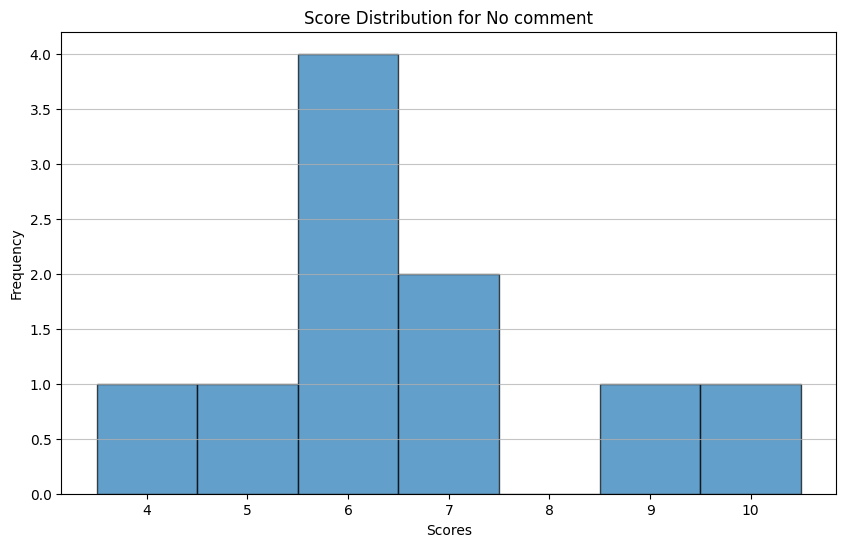

No_hint - Mean: 6.60, Standard Deviation: 1.69


ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [11]:
# auto_grade_stats = parse_and_plot('auto_graded_GPT4.json')

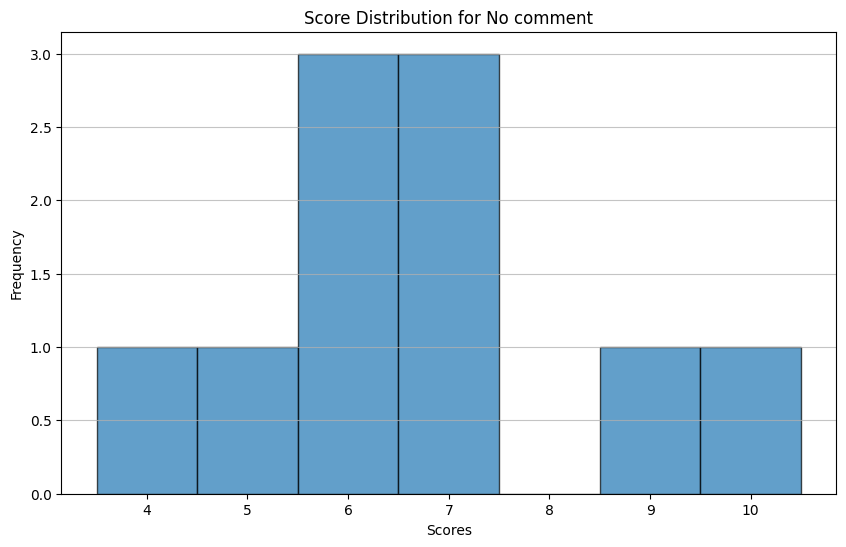

No_hint - Mean: 6.70, Standard Deviation: 1.68


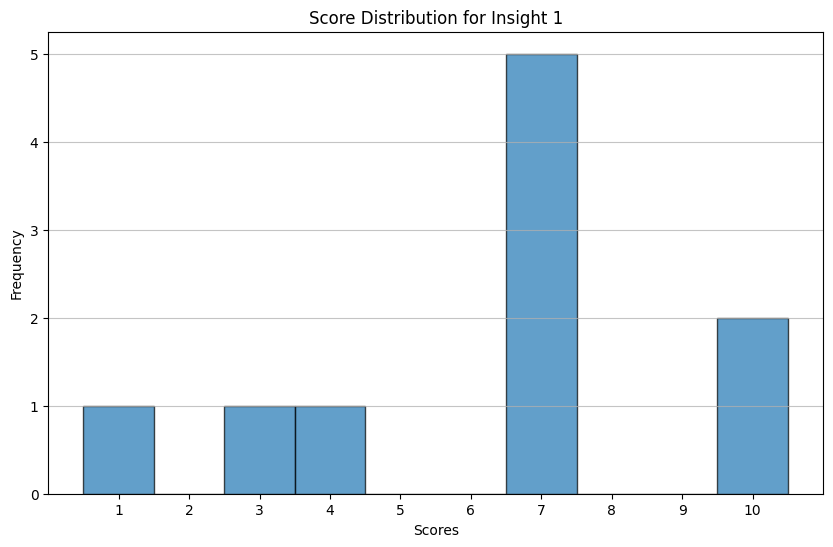

Hint1_summary - Mean: 6.30, Standard Deviation: 2.72


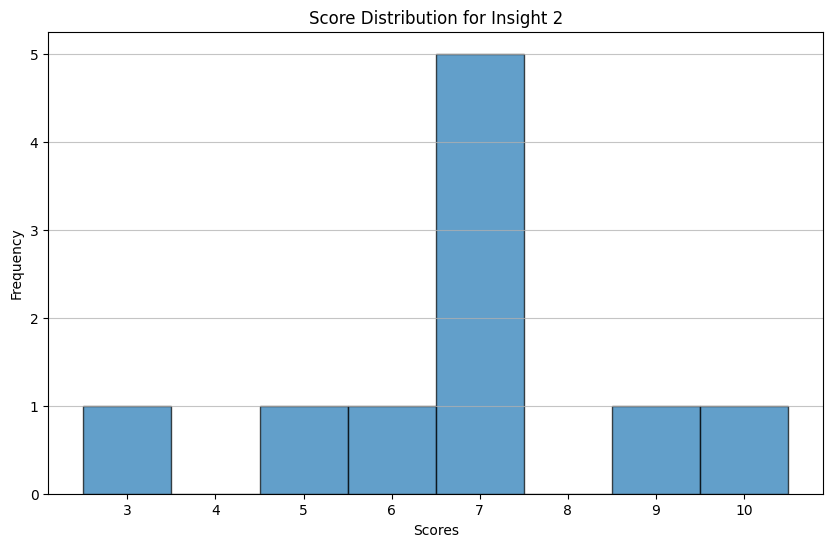

Hint2_summary - Mean: 6.80, Standard Deviation: 1.83


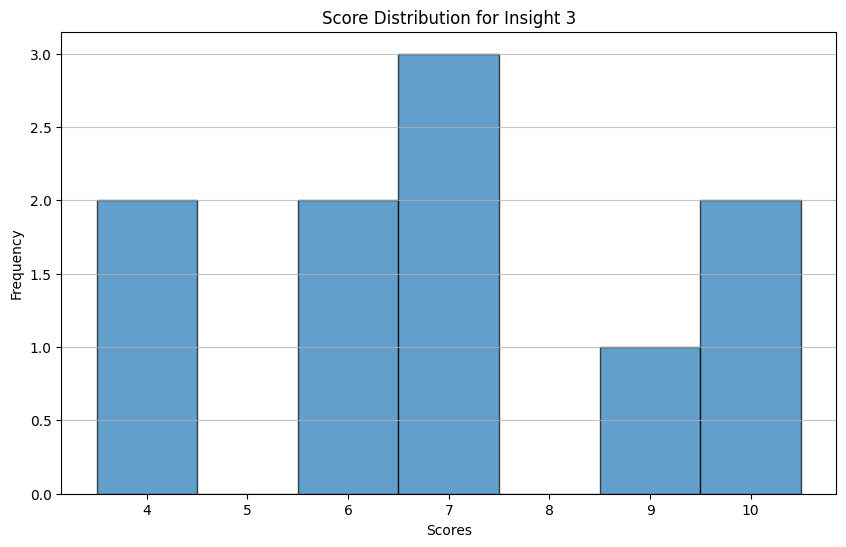

Hint3_summary - Mean: 7.00, Standard Deviation: 2.05


In [13]:
auto_grade_sum_stats = parse_and_plot('auto_graded_GPT4_summary.json')

In [37]:
def plot_distribution(data, category, grades, type, subplot_position, fig):
    # Configure the subplot at the specified position
    ax = fig.add_subplot(2, 3, subplot_position)

    cate = ''
    if type == 'No_hint':
        cate = 'No comment'
    elif type == 'Hint1':
        cate = 'Comment 1'
    elif type == 'Hint1_summary':
        cate = 'Insight 1'
    elif type == 'Hint2':
        cate = 'Comment 2'
    elif type == 'Hint2_summary':
        cate = 'Insight 2'
    elif type == 'Hint3':
        cate = 'Comment 3'
    elif type == 'Hint3_summary':
        cate = 'Insight 3'
    
    bin_edges = np.arange(int(min(grades)), int(max(grades)) + 2) - 0.5
    ax.hist(grades, bins=bin_edges, alpha=0.7, edgecolor='black')
    ax.set_title(f'Score Distribution \n for {cate}', fontsize=14, fontname="Times New Roman", fontweight="bold")
    ax.set_xlabel('Scores', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(axis='y', alpha=0.75)
    ax.set_xticks(np.arange(int(min(grades)), int(max(grades)) + 1))
    ax.set_xlim(0, 11)
    # ax.set_ylim(0, 10)

def calculate_stats(data, key):
    # Extract the grades for the given key and convert them to float
    grades = [float(item[key]['grade']) for item in data if key in item]
    mean = np.mean(grades)
    std_dev = np.std(grades)
    return grades, mean, std_dev

def parse_and_plot(file_path, type, fig, start_pos):
    with open(file_path, 'r', encoding='utf-8') as file:
        quiz_data = json.load(file)
    if file_path == 'auto_graded_GPT4.json':
        categories = ['Hint1', 'Hint2', 'Hint3']
    else:
        categories = ['Hint1_summary', 'Hint2_summary', 'Hint3_summary']
    c_name= ['No_hint', 'Unrelated_hint', 'Vague_hint', 'Insightful_hint']
    stats = {}
    subplot_position = start_pos

    for x,category in enumerate(categories):
        if category == 'No_hint':
            continue
        grades, mean, std_dev = calculate_stats(quiz_data, category)
        stats[category] = {'mean': mean, 'std_dev': std_dev}
        plot_distribution(quiz_data, c_name[x], grades, category, subplot_position, fig)
        subplot_position += 1
        print(f"{category} - Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

    return stats

Hint1 - Mean: 7.40, Standard Deviation: 1.91
Hint2 - Mean: 6.60, Standard Deviation: 2.11
Hint3 - Mean: 6.80, Standard Deviation: 1.17
Hint1_summary - Mean: 6.30, Standard Deviation: 2.72
Hint2_summary - Mean: 6.80, Standard Deviation: 1.83


ValueError: num must be an integer with 1 <= num <= 6, not 7

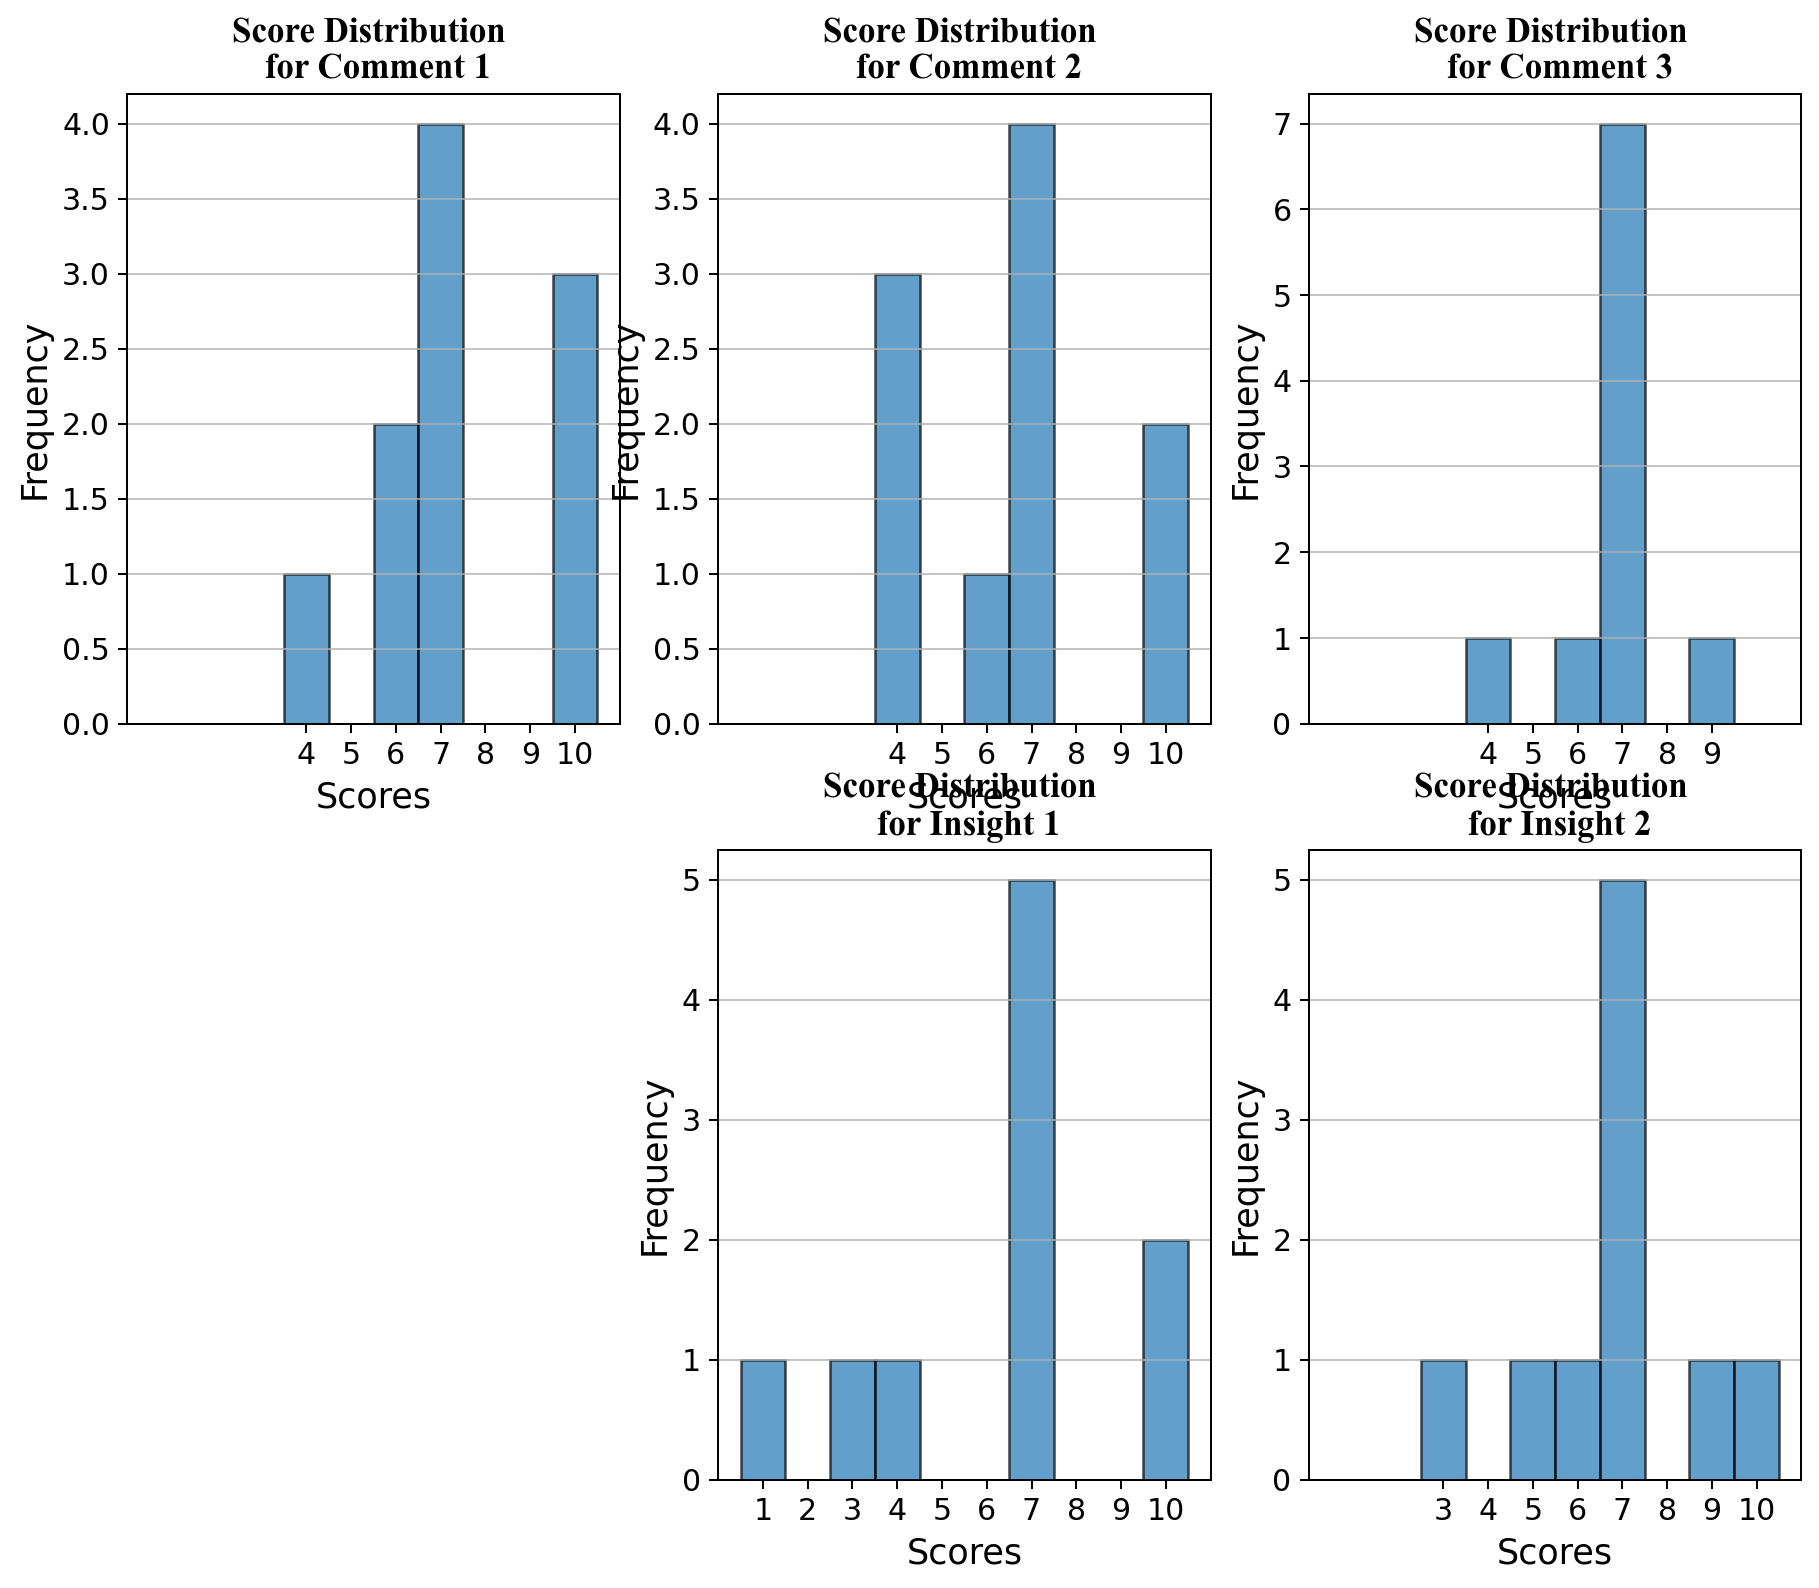

In [38]:
# Initialize a large figure for the 4x3 panel
fig = plt.figure(figsize=(12, 10), dpi=180)

# File paths
file_paths = ['auto_graded_GPT4.json', 'auto_graded_GPT4_summary.json']
grade_name=['Manual', 'Auto_1', 'Auto_2']

# Parse and plot for each file
start_pos=1
for i, file_path in enumerate(file_paths):
    category_stats = parse_and_plot(file_path, grade_name[i], fig, start_pos)
    start_pos+=4

# Show the final panel of plots
plt.tight_layout()
plt.savefig('3x4_plot_panel.png')
plt.show()